In [ ]:
# Tissue Spatial Geometrics Lab 

# This script creates box-and-whisker plots between categories of data. It was meant to show the 
#    mean and quartiles for each bin of FFT data from the LCPC Transform.

### Instructions ###
# The input CSV file should be formatted like in the below picture. 
# The first row (starting from the 2nd column) should contain category labels that you want to compare.
# The second row (starting from the 2nd column) should contain the name of your samples.
# The first column (starting from the 3rd row) should contain the numbers of rows in your data.
#    The number of rows should match the number of rows in the longest column. 
#    The name of the first column (at row 2) does NOT matter.

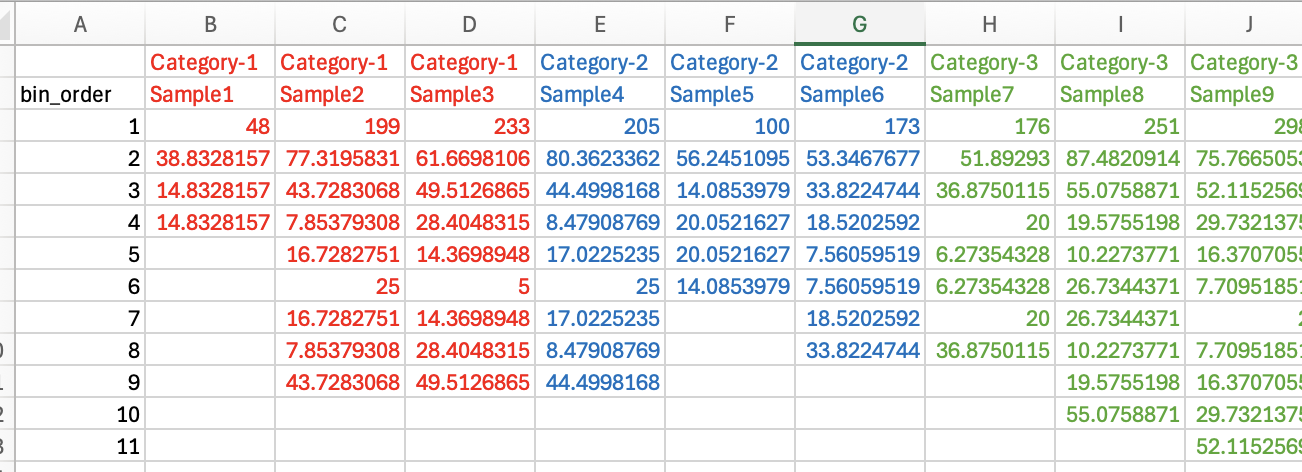

In [1]:
# Load dependencies
import pandas as pd
import matplotlib.pyplot as plt

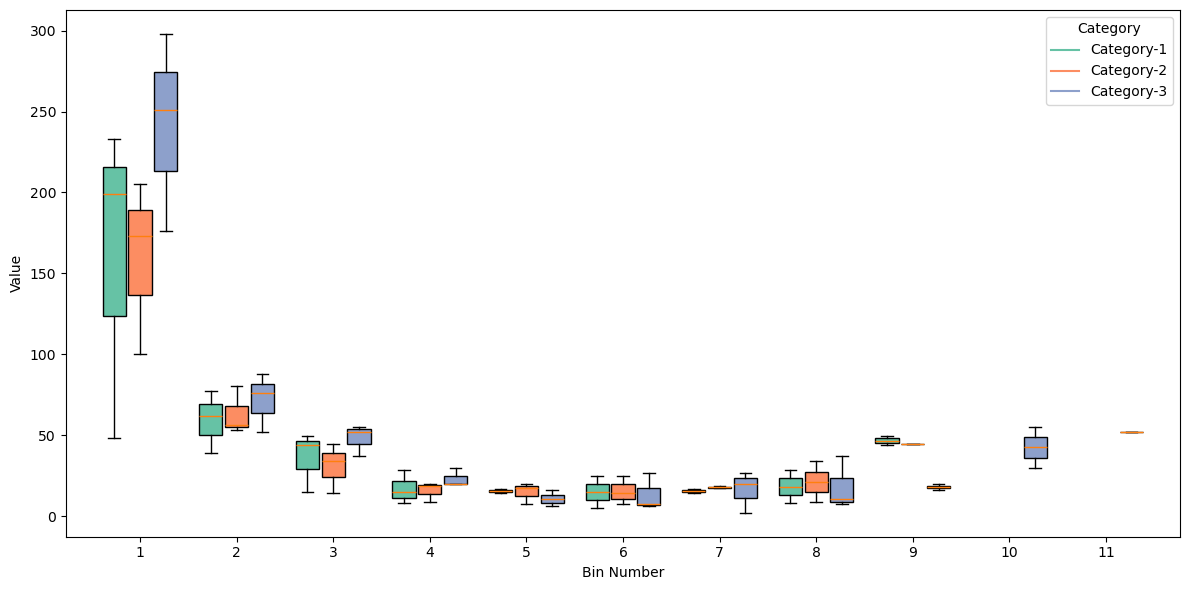

In [2]:
# Step 1. Paste in file path to the csv file.
file_path = '/Users/davidnguyen/Documents/Dave Personal Stuff/TSG Lab/Projects/Alzheimers/ADNI/practice_data_box-whisker.csv'
df = pd.read_csv(file_path, header=None)

# ---- Structure ----
categories = df.iloc[0, 1:]                 # first row, excluding column 0
entry_ids = df.iloc[2:, 0].dropna()         # column 0 defines entries
data = df.iloc[2:, 1:].apply(pd.to_numeric, errors='coerce')  # numeric data only

unique_categories = categories.unique()
n_categories = len(unique_categories)
n_entries = len(entry_ids)

# ---- Collect data grouped by entry (row) ----
grouped_data = []

for i in range(n_entries):
    row_group = []
    for cat in unique_categories:
        cols = categories[categories == cat].index - 1  # adjust for removed col 0
        values = data.iloc[i, cols].dropna().values
        row_group.append(values)
    grouped_data.append(row_group)

# ---- Plot ----
fig, ax = plt.subplots(figsize=(12, 6))

width = 0.8 / n_categories
positions = []
plot_data = []

for i in range(n_entries):
    for j in range(n_categories):
        pos = i + j * width
        positions.append(pos)
        plot_data.append(grouped_data[i][j])

box = ax.boxplot(plot_data, positions=positions,
                 widths=width*0.9, patch_artist=True)

# Color by category
colors = plt.cm.Set2.colors
for i, patch in enumerate(box['boxes']):
    patch.set_facecolor(colors[i % n_categories])

# X-axis labels (use actual entry numbers from column 1)
ax.set_xticks([i + width*(n_categories-1)/2 for i in range(n_entries)])
ax.set_xticklabels(entry_ids.astype(int).values)

ax.set_xlabel("Bin Number")
ax.set_ylabel("Value")

# Legend
for i, cat in enumerate(unique_categories):
    ax.plot([], [], color=colors[i], label=cat)

ax.legend(title="Category")

plt.tight_layout()
plt.show()
